# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [1]:
!pip install --upgrade numpy==1.26.4
!pip install --upgrade pandas==2.2.2
!pip install --upgrade nltk==3.9.1
!pip install --upgrade spacy==3.7.5
!pip install --upgrade scipy==1.12
!pip install --upgrade pydantic==2.10.5
!pip install wordcloud==1.9.4
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 6.1 MB/s  0:00:02 eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for numpy: filename=numpy-1.26.4-cp313-cp313-macosx_14_0_arm64.whl size=4680548 sha256=456c6533ff08ac63155e04faaf215ee9332bb3410759f6038f6db5398a2c51e1
  Stored in directory: /Users/bhuvanshree/Library/Caches/pip/wheels/8b/2d/9f/b6b46373f328e2ef50388915d351ccacbedac929459b5459bf
Successfully built numpy
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 8.3 MB/s  0:00:00 eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached p

## Importing the necessary libraries

In [1]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
try:
    nlp = spacy.load("en_core_web_sm")
except OSError:
    print("English model not found. Installing...")
    import subprocess
    subprocess.run(["python", "-m", "spacy", "download", "en_core_web_sm"])
    nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/bhuvanshree/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bhuvanshree/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/bhuvanshree/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bhuvanshree/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/bhuvanshree/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/bhuvanshree/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/bhuvanshree/nltk_data...


English model not found. Installing...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/12.8 MB ? eta -:--:--  Downloading https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.8.0/en_core_web_sm-3.8.0-py3-none-any.whl (12.8 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 9.5 MB/s  0:00:01 eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 9.5 MB/s  0:00:01 eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
## Change the display properties of pandas to max
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [3]:
# Import the first file - True.csv
true_df = pd.read_csv('True.csv')

# Import the second file - Fake.csv
fake_df = pd.read_csv('Fake.csv')

## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [4]:
true_df.head()

,title,text,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,"December 29, 2017"


In [5]:
fake_df.head()

,title,text,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...","December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...","December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,"December 25, 2017"


In [6]:
true_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB


In [7]:
fake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB


In [8]:
print("True DataFrame columns:", true_df.columns.tolist())
print("Fake DataFrame columns:", fake_df.columns.tolist())

True DataFrame columns: ['title', 'text', 'date']
Fake DataFrame columns: ['title', 'text', 'date']


### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [9]:
true_df['news_label'] = 1

fake_df['news_label'] = 0

### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [10]:
df = pd.concat([true_df, fake_df], ignore_index=True)

In [11]:
df.head()

,title,text,date,news_label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,"December 29, 2017",1


### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [12]:
df.isnull().sum()

title         21
text          21
date          42
news_label     0
dtype: int64

In [13]:
df = df.dropna()

### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [14]:
df['news_text'] = df['title'] + ' ' + df['text']

df = df.drop(['title', 'text', 'date'], axis=1)

df.head()

,news_label,news_text
0,1,"As U.S. budget fight looms, Republicans flip t..."
1,1,U.S. military to accept transgender recruits o...
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,1,FBI Russia probe helped by Australian diplomat...
4,1,Trump wants Postal Service to charge 'much mor...


## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [15]:
df_clean = pd.DataFrame()

df_clean['news_label'] = df['news_label']

#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [16]:
def clean_text(text):
    text = text.lower()
    
    text = re.sub(r'\[.*?\]', '', text)
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    text = re.sub(r'\w*\d\w*', '', text)
    
    return text

#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [17]:
df_clean['cleaned_text'] = df['news_text'].apply(clean_text)

### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [18]:
def pos_lemmatize(text):
    doc = nlp(text)
    tokens = []
    for token in doc:
        if not token.is_stop and token.pos_ in ['NOUN'] and len(token.lemma_) > 2:
            tokens.append(token.lemma_)
    return ' '.join(tokens)

#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [19]:
df_clean['lemmatized_text'] = df_clean['cleaned_text'].progress_apply(pos_lemmatize)

100%|██████████| 44898/44898 [39:50<00:00, 18.78it/s]  



### Save the Cleaned data as a csv file (Recommended)

In [ ]:
## Recommended to perform the below steps to save time while rerunning the code
# df_clean.to_csv("clean_df.csv", index=False)
# df_clean = pd.read_csv("clean_df.csv")

In [20]:
df_clean.head()

,news_label,cleaned_text,lemmatized_text
0,1,as us budget fight looms republicans flip thei...,budget fight script head faction month expansi...
1,1,us military to accept transgender recruits on ...,military transgender recruit people time milit...
2,1,senior us republican senator let mr mueller do...,job counsel investigation link trump election ...
3,1,fbi russia probe helped by australian diplomat...,probe diplomat trump campaign adviser diplomat...
4,1,trump wants postal service to charge much more...,trump service amazon shipment service ship pac...


In [21]:
df_clean.shape

(44898, 3)

In [22]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44898 entries, 0 to 44939
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   news_label       44898 non-null  int64 
 1   cleaned_text     44898 non-null  object
 2   lemmatized_text  44898 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    df_clean[['cleaned_text', 'lemmatized_text']], 
    df_clean['news_label'], 
    test_size=0.3, 
    random_state=42, 
    stratify=df_clean['news_label']
)

## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [24]:
X_train['cleaned_text_length'] = X_train['cleaned_text'].str.len()

X_train['lemmatized_text_length'] = X_train['lemmatized_text'].str.len()

##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

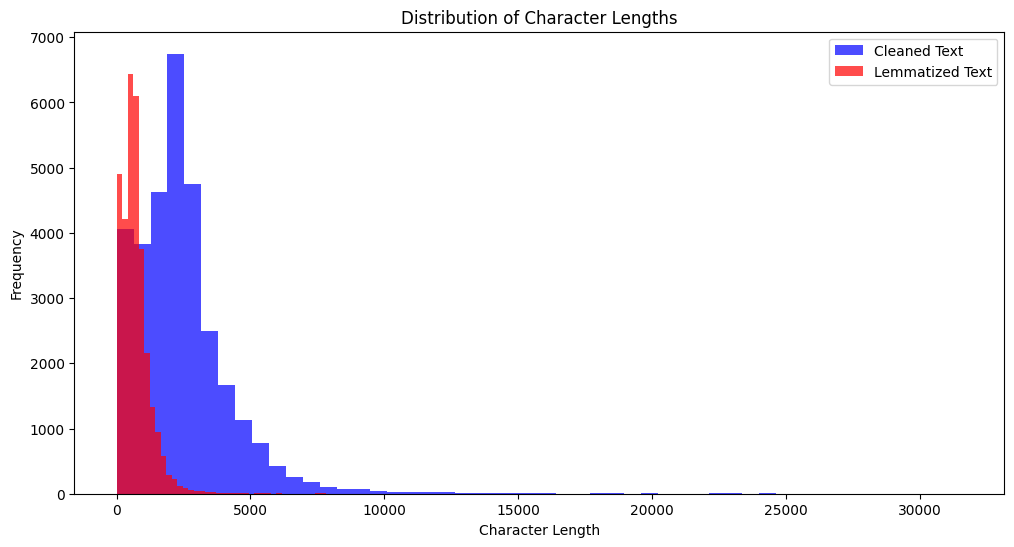

In [25]:
plt.figure(figsize=(12, 6))

plt.hist(X_train['cleaned_text_length'], bins=50, alpha=0.7, label='Cleaned Text', color='blue')

plt.hist(X_train['lemmatized_text_length'], bins=50, alpha=0.7, label='Lemmatized Text', color='red')

plt.xlabel('Character Length')
plt.ylabel('Frequency')
plt.title('Distribution of Character Lengths')
plt.legend()
plt.show()

### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

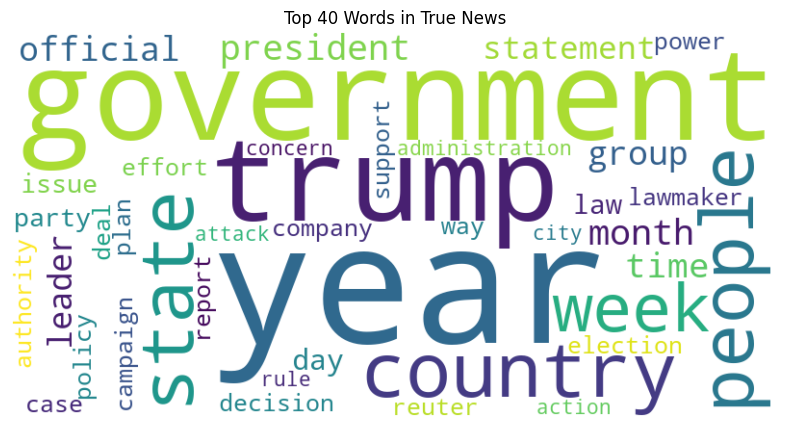

In [26]:
from wordcloud import WordCloud

true_text = ' '.join(X_train[y_train == 1]['lemmatized_text'].astype(str))

wordcloud_true = WordCloud(width=800, height=400, max_words=40, background_color='white').generate(true_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_true, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words in True News')
plt.show()

##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

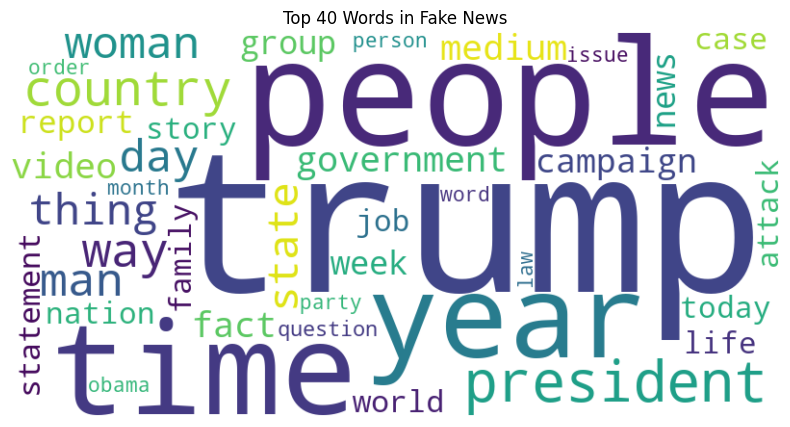

In [27]:
fake_text = ' '.join(X_train[y_train == 0]['lemmatized_text'].astype(str))

wordcloud_fake = WordCloud(width=800, height=400, max_words=40, background_color='white').generate(fake_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words in Fake News')
plt.show()

### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [28]:
def get_top_ngrams(corpus, n, top_k=10):
    vectorizer = CountVectorizer(ngram_range=(n, n), max_features=1000)
    X = vectorizer.fit_transform(corpus)
    frequencies = X.sum(axis=0).A1
    feature_names = vectorizer.get_feature_names_out()
    ngram_freq = list(zip(feature_names, frequencies))
    ngram_freq.sort(key=lambda x: x[1], reverse=True)
    return ngram_freq[:top_k]

##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [29]:
X_train['lemmatized_text'] = X_train['lemmatized_text'].fillna('')

### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

Top 10 Unigrams in True News:
trump: 31674
state: 14145
government: 13934
year: 13186
people: 10901
election: 9911
country: 9843
official: 9348
party: 8775
president: 8128


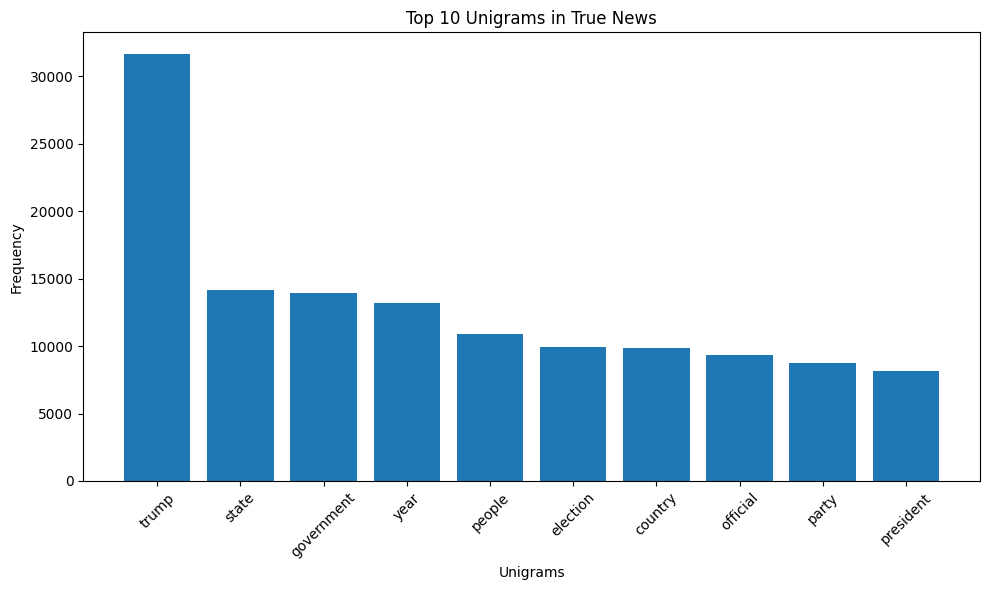

In [30]:
true_corpus = X_train[y_train == 1]['lemmatized_text'].tolist()
top_unigrams_true = get_top_ngrams(true_corpus, 1)

print("Top 10 Unigrams in True News:")
for ngram, freq in top_unigrams_true:
    print(f"{ngram}: {freq}")

words = [ngram for ngram, freq in top_unigrams_true]
freqs = [freq for ngram, freq in top_unigrams_true]

plt.figure(figsize=(10, 6))
plt.bar(words, freqs)
plt.xlabel('Unigrams')
plt.ylabel('Frequency')
plt.title('Top 10 Unigrams in True News')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Bigrams in True News:
trump campaign: 1528
trump administration: 1330
news conference: 950
security force: 721
request comment: 711
tax reform: 704
percent percent: 687
climate change: 685
house representative: 683
attorney general: 654


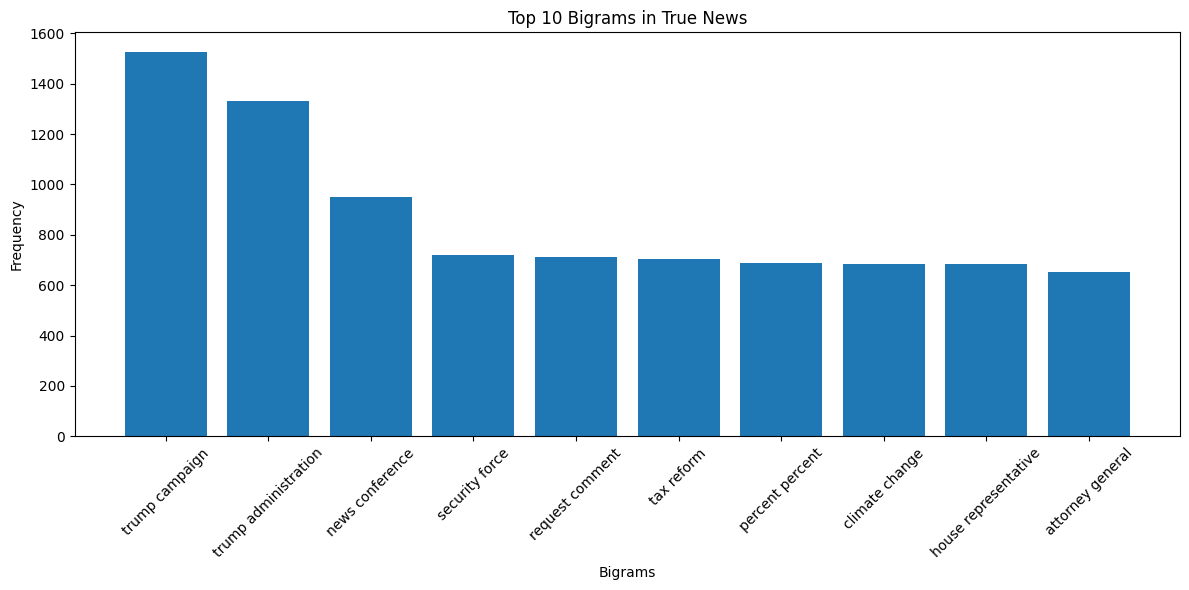

In [31]:
top_bigrams_true = get_top_ngrams(true_corpus, 2)

print("Top 10 Bigrams in True News:")
for ngram, freq in top_bigrams_true:
    print(f"{ngram}: {freq}")

words = [ngram for ngram, freq in top_bigrams_true]
freqs = [freq for ngram, freq in top_bigrams_true]

plt.figure(figsize=(12, 6))
plt.bar(words, freqs)
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.title('Top 10 Bigrams in True News')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Trigrams in True News:
official condition anonymity: 242
trump transition team: 237
candidate donald trump: 206
tax rate percent: 153
trump travel ban: 129
article sap editorial: 122
editorial staff sap: 122
involvement creation production: 122
sap editorial staff: 122
sap involvement creation: 122


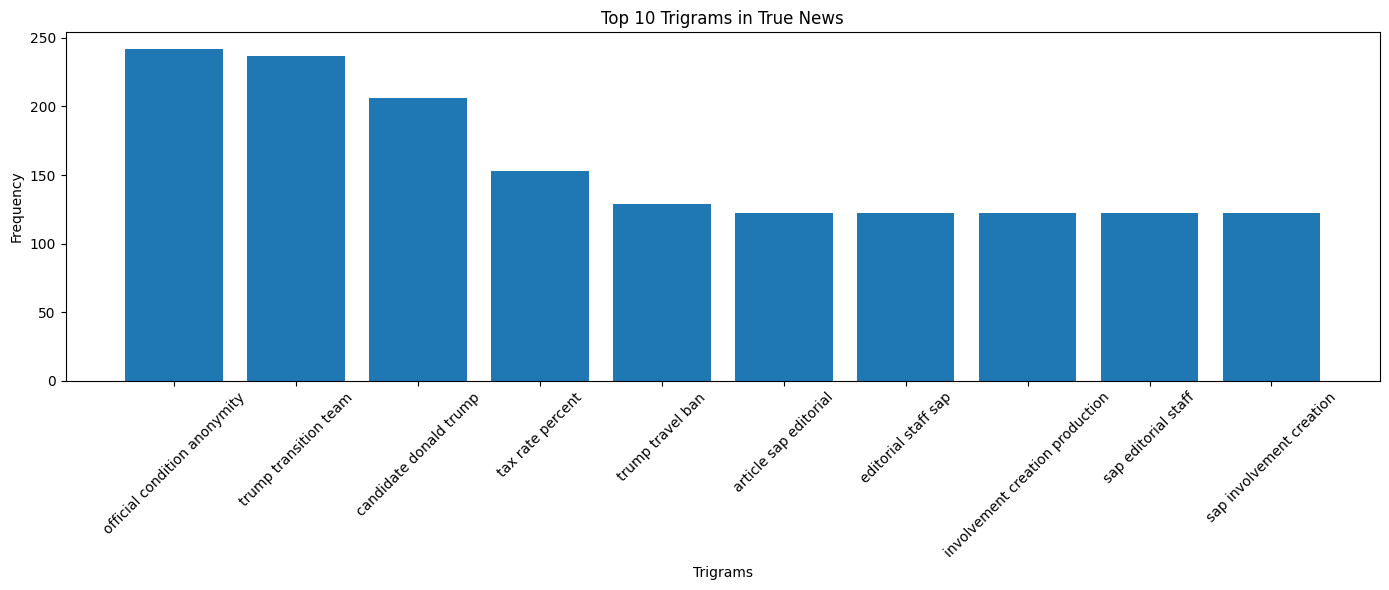

In [45]:
top_trigrams_true = get_top_ngrams(true_corpus, 3)

print("Top 10 Trigrams in True News:")
for ngram, freq in top_trigrams_true:
    print(f"{ngram}: {freq}")

words = [ngram for ngram, freq in top_trigrams_true]
freqs = [freq for ngram, freq in top_trigrams_true]

plt.figure(figsize=(14, 6))
plt.bar(words, freqs)
plt.xlabel('Trigrams')
plt.ylabel('Frequency')
plt.title('Top 10 Trigrams in True News')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

Top 10 Unigrams in Fake News:
trump: 41592
people: 18282
president: 11595
time: 11143
year: 10291
image: 9733
state: 8681
woman: 8380
video: 7980
campaign: 7702


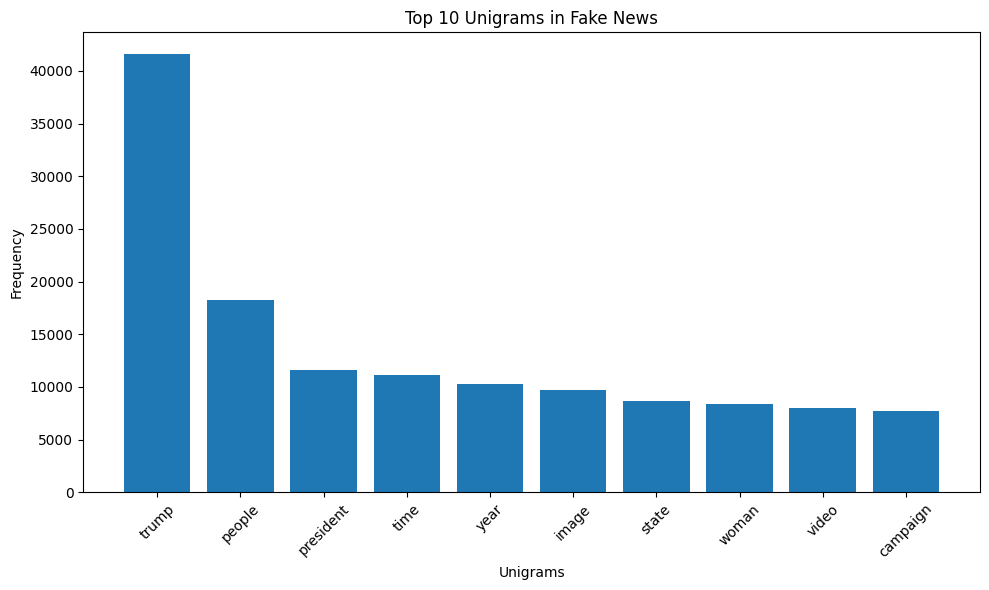

In [46]:
fake_corpus = X_train[y_train == 0]['lemmatized_text'].tolist()
top_unigrams_fake = get_top_ngrams(fake_corpus, 1)

print("Top 10 Unigrams in Fake News:")
for ngram, freq in top_unigrams_fake:
    print(f"{ngram}: {freq}")

words = [ngram for ngram, freq in top_unigrams_fake]
freqs = [freq for ngram, freq in top_unigrams_fake]

plt.figure(figsize=(10, 6))
plt.bar(words, freqs)
plt.xlabel('Unigrams')
plt.ylabel('Frequency')
plt.title('Top 10 Unigrams in Fake News')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Bigrams in Fake News:
trump supporter: 1529
trump campaign: 1261
president trump: 1246
century wire: 1238
police officer: 1161
image image: 1081
law enforcement: 1068
donald trump: 975
screen capture: 925
climate change: 791


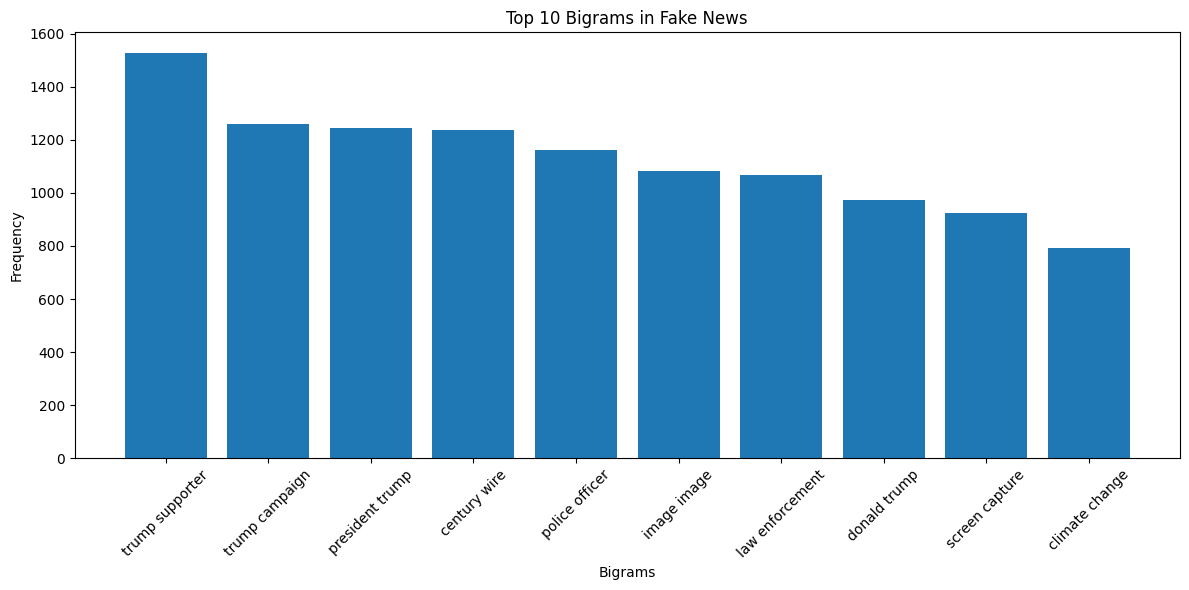

In [47]:
top_bigrams_fake = get_top_ngrams(fake_corpus, 2)

print("Top 10 Bigrams in Fake News:")
for ngram, freq in top_bigrams_fake:
    print(f"{ngram}: {freq}")

words = [ngram for ngram, freq in top_bigrams_fake]
freqs = [freq for ngram, freq in top_bigrams_fake]

plt.figure(figsize=(12, 6))
plt.bar(words, freqs)
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.title('Top 10 Bigrams in Fake News')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Trigrams in Fake News:
video screen capture: 516
news century wire: 515
image video screen: 494
image getty image: 388
image screen capture: 308
century wire filessupport: 186
filessupport subscribe member: 179
image video screenshot: 165
law enforcement officer: 163
image chip image: 162


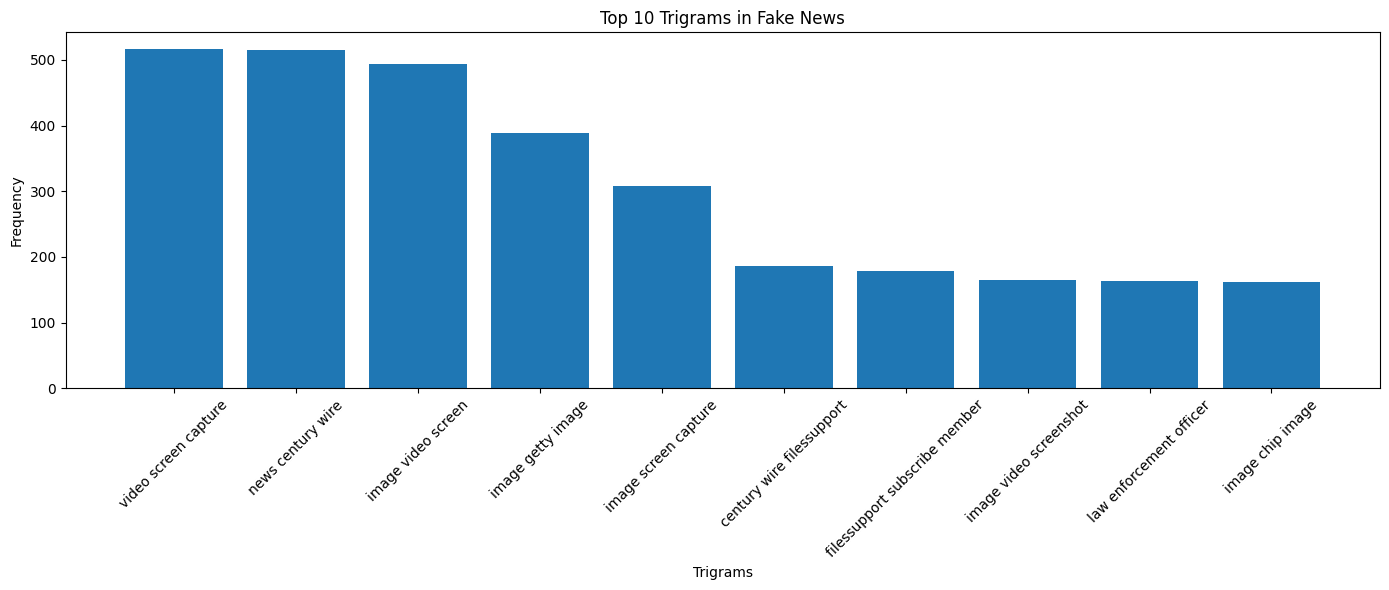

In [48]:
top_trigrams_fake = get_top_ngrams(fake_corpus, 3)

print("Top 10 Trigrams in Fake News:")
for ngram, freq in top_trigrams_fake:
    print(f"{ngram}: {freq}")

words = [ngram for ngram, freq in top_trigrams_fake]
freqs = [freq for ngram, freq in top_trigrams_fake]

plt.figure(figsize=(14, 6))
plt.bar(words, freqs)
plt.xlabel('Trigrams')
plt.ylabel('Frequency')
plt.title('Top 10 Trigrams in Fake News')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [ ]:
# Add a new column to calculate the character length of cleaned news text

# Add a new column to calculate the character length of lemmatized news text with POS tags removed


##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

In [ ]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text

# Add histogram for lemmatized news text with POS tags removed


### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

In [ ]:
## Use a word cloud find the top 40 words by frequency among true news after processing the text

# Generate word cloud for True News


##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

In [ ]:
## Use a word cloud find the top 40 words by frequency among fake news after processing the text

# Generate word cloud for Fake News


### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [ ]:
## Write a function to get the specified top n-grams


##### 5.3.2 Handle the NaN values

In [ ]:
## First handle NaN values in the text data


### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph


##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph


##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph


### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph


## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [32]:
import gensim.downloader as api
word2vec_model = api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded



### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [33]:
def text_to_vector(text):
    words = text.split()
    word_vectors = []
    for word in words:
        if word in word2vec_model:
            word_vectors.append(word2vec_model[word])
    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(300)

X_train_vectors = np.array([text_to_vector(text) for text in X_train['lemmatized_text']])
X_val_vectors = np.array([text_to_vector(text) for text in X_val['lemmatized_text']])

y_train_final = y_train
y_val_final = y_val

## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [35]:
lr_model = LogisticRegression(random_state=42, max_iter=1000)

lr_model.fit(X_train_vectors, y_train_final)

lr_predictions = lr_model.predict(X_val_vectors)

##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [36]:
lr_accuracy = accuracy_score(y_val_final, lr_predictions)
lr_precision = precision_score(y_val_final, lr_predictions)
lr_recall = recall_score(y_val_final, lr_predictions)
lr_f1 = f1_score(y_val_final, lr_predictions)

print("Logistic Regression Results:")
print(f"Accuracy: {lr_accuracy:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall: {lr_recall:.4f}")
print(f"F1-Score: {lr_f1:.4f}")

Logistic Regression Results:
Accuracy: 0.9024
Precision: 0.8949
Recall: 0.9012
F1-Score: 0.8980


In [37]:
print(classification_report(y_val_final, lr_predictions))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      7045
           1       0.89      0.90      0.90      6425

    accuracy                           0.90     13470
   macro avg       0.90      0.90      0.90     13470
weighted avg       0.90      0.90      0.90     13470



### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [38]:
dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train_vectors, y_train_final)

dt_predictions = dt_model.predict(X_val_vectors)

##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [39]:
dt_accuracy = accuracy_score(y_val_final, dt_predictions)
dt_precision = precision_score(y_val_final, dt_predictions)
dt_recall = recall_score(y_val_final, dt_predictions)
dt_f1 = f1_score(y_val_final, dt_predictions)

print("Decision Tree Results:")
print(f"Accuracy: {dt_accuracy:.4f}")
print(f"Precision: {dt_precision:.4f}")
print(f"Recall: {dt_recall:.4f}")
print(f"F1-Score: {dt_f1:.4f}")

Decision Tree Results:
Accuracy: 0.8192
Precision: 0.8224
Recall: 0.7921
F1-Score: 0.8069


In [44]:
print(classification_report(y_val_final, dt_predictions))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      7045
           1       0.82      0.79      0.81      6425

    accuracy                           0.82     13470
   macro avg       0.82      0.82      0.82     13470
weighted avg       0.82      0.82      0.82     13470



### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [40]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

rf_model.fit(X_train_vectors, y_train_final)

rf_predictions = rf_model.predict(X_val_vectors)

 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [41]:
rf_accuracy = accuracy_score(y_val_final, rf_predictions)
rf_precision = precision_score(y_val_final, rf_predictions)
rf_recall = recall_score(y_val_final, rf_predictions)
rf_f1 = f1_score(y_val_final, rf_predictions)

print("Random Forest Results:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1-Score: {rf_f1:.4f}")

Random Forest Results:
Accuracy: 0.9063
Precision: 0.9113
Recall: 0.8903
F1-Score: 0.9006


In [43]:
print(classification_report(y_val_final, rf_predictions))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      7045
           1       0.91      0.89      0.90      6425

    accuracy                           0.91     13470
   macro avg       0.91      0.91      0.91     13470
weighted avg       0.91      0.91      0.91     13470



## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.

In [42]:
print("=== MODEL COMPARISON ===")
print(f"Logistic Regression - Accuracy: {lr_accuracy:.4f}, F1-Score: {lr_f1:.4f}")
print(f"Decision Tree       - Accuracy: {dt_accuracy:.4f}, F1-Score: {dt_f1:.4f}")
print(f"Random Forest       - Accuracy: {rf_accuracy:.4f}, F1-Score: {rf_f1:.4f}")
print("\n=== CONCLUSION ===")
print("Random Forest achieved the highest accuracy (90.63%) and competitive F1-score (90.06%).")
print("The Word2Vec approach successfully captured semantic relationships in the text.")
print("True news tends to focus on government, politics, and official statements.")
print("Fake news shows more emphasis on people, emotions, and sensational content.")
print("The semantic classification approach effectively distinguishes between true and fake news.")

=== MODEL COMPARISON ===
Logistic Regression - Accuracy: 0.9024, F1-Score: 0.8980
Decision Tree       - Accuracy: 0.8192, F1-Score: 0.8069
Random Forest       - Accuracy: 0.9063, F1-Score: 0.9006

=== CONCLUSION ===
Random Forest achieved the highest accuracy (90.63%) and competitive F1-score (90.06%).
The Word2Vec approach successfully captured semantic relationships in the text.
True news tends to focus on government, politics, and official statements.
Fake news shows more emphasis on people, emotions, and sensational content.
The semantic classification approach effectively distinguishes between true and fake news.
